## <center> Go to piazza and open today's lecture notes in the hub! </center>
## <center> https://piazza.com/class/jzioyk40mhs6r2 </center>
## <center> Let's go to tophat for attendance! </center>
## <center> https://app.tophat.com/e/245218 </center>

## <center> Mud card </center>
- **Can we go over matshow() and what it does?**

In [8]:
import matplotlib
from matplotlib import pylab as plt
# help(plt.matshow)

- **What is pipeline () doing?**

In [1]:
from sklearn.pipeline import Pipeline
# help(Pipeline)

- **I'm unsure what is meant by "balance" of a dataset.**
   - The balance of a classification problem gives you a baseline accuracy score your machine learning model should beat.

- **Why don't we just  use count_matrix = df.groupby(['race']).size() and then choose the "gross-income" column to be displayed? to put it another way, what are the use cases of unstack?**
   - there are multiple correct ways to produce the same output dataframe, figure, ML model, etc.
   - if it returns the same matrix, feel free to use it

In [2]:
import pandas as pd
# help(pd.DataFrame.unstack)

- **Preprocessing has been a bit of a whirlwind for me. at some point can we go over an brief overview/summary of key takeaways we should  have from preprocessing to ensure i have the correct understanding**
   - Next tuesday
   

- **When dealing with missing data, if we impute before we preprocess and then use the new complete dataset for preprocessing, what sort of biases are potentially introduced? is it better to just delete versus impute then use the imputed feature information for feature importance when training your data? is there a rule of thumb for this sort of thing?**
   - my (subjective) suggestion is this:
       - run the mcar test 
       - if the p value is >0.05 
           - delete the rows and check how the ML  model performs
           - if you are not happy with the performance, try some imputation methods
           - that might help with the performance
       - if the p value is <0.05
           - try the mutlivariate imputation and the other imputation techniques we will cover in november

- **Which should be done first, preprocessing or eda? couldn’t eda be useful for making informed decisions in processing the data?**
   - do both in parallel
- **How do we understand the overlap of data points in the scatter matrix? does that mean the more overlap, the more correlated the two features are?**
   - with 30,000 points, some overlap is unavoidable.
   - overlap doesn't necessarily mean correlation.

# Feature selection, dimensionality reduction, and feature engineering
### By the end of this lecture, you will be able to
- select features in supervised ML
- apply principal component analysis to your data
- engineer features


### <font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- **select features in supervised ML**
- <font color='LIGHTGRAY'>apply principal component analysis to your data</font>
- <font color='LIGHTGRAY'>engineer features</font>


## Feature selection

We cover today how to do feature selection **before** the ML model is trained. We cover later how to select features with ML feature importances.

Necessary if 
- you have too many features: n_ftrs > n_points (some algorithms break down)
- if training an ML algorithm is too computationally expensive using all the features


### Approach

1) You calculate a single number metric between each feature and the target variable **using the training data only**.

- sklearn supported metrics (for both regression and classification)
   - [F test](https://en.wikipedia.org/wiki/F-test) (only measures linear dependency)
   - [mutual information](https://en.wikipedia.org/wiki/Mutual_information) (measures any type of dependency)

2) Keep k best features (SelectKBest method) or keep a certain percentile of the best features (SelectPercentile method).


#### Pros:
- easy to do
- it is quicker to train ML models with fewer features
- your model might become more accuracte

#### Cons:
- feature interactions are not taken into account (e.g., two features combined can accurately predict the target variable)
- your model might loose some accuracy

### Example

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression
np.random.seed(10)

X = np.random.rand(1000,3)
y = X[:,0] + np.sin(6 * np.pi * X[:,1]) + 0.000 * X[:,2]

f_test, p_values = f_regression(X, y)
print('f score',f_test)
print('p values',p_values)
mi = mutual_info_regression(X, y)
print('mi',mi)

f score [108.17840941  54.46174491   0.46764301]
p values [3.98626770e-24 3.33339370e-13 4.94232243e-01]
mi [0.43033425 0.881405   0.        ]


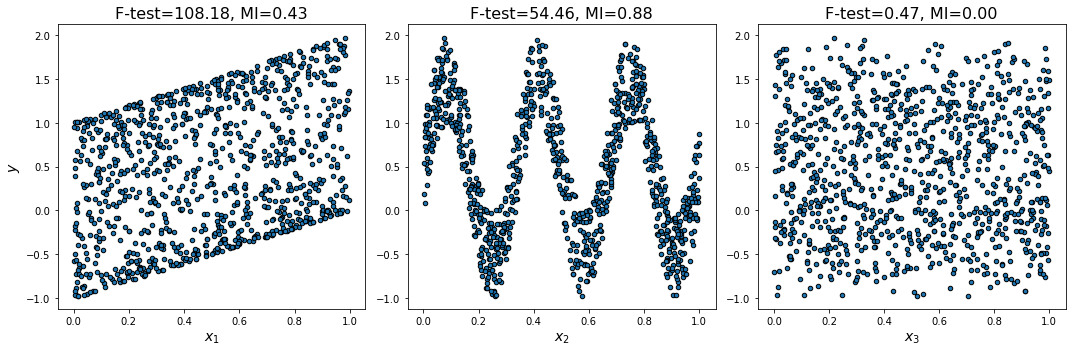

In [67]:
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y, edgecolor='black', s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]),
              fontsize=16)
plt.tight_layout()
plt.show()

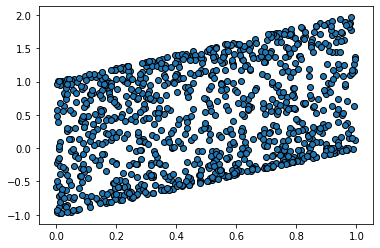

[ True False False]


In [68]:
from sklearn.feature_selection import SelectKBest
f_select = SelectKBest(f_regression,k=1)
X_f = f_select.fit_transform(X,y)
plt.scatter(X_f,y,edgecolor='k')
plt.show()
# the features selected:
print(f_select.get_support())

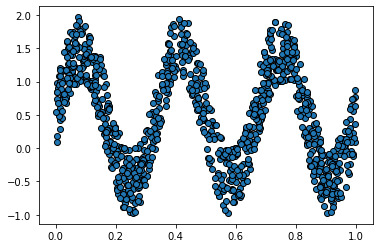

array([False,  True, False])

In [70]:
from sklearn.feature_selection import SelectPercentile
f_selector = SelectPercentile(mutual_info_regression,percentile=33)
X_mi = f_selector.fit_transform(X,y)
plt.scatter(X_mi,y,edgecolor='k')
plt.show()
# features selected
f_selector.get_support()

### Be careful though!

In [71]:
# toy data
import pandas as pd
import numpy as np
from sklearn.feature_selection import f_classif, mutual_info_classif
np.random.seed(0)

X = np.random.uniform(size=(1000,2)) 

y = np.zeros(1000)
y[(X[:,0]>=0.5)&(X[:,1]<0.5)] = 1
y[(X[:,0]<=0.5)&(X[:,1]>0.5)] = 1

In [72]:
f_test, p_values = f_classif(X, y)
print('f score',f_test)
print('p values',p_values)

mi = mutual_info_classif(X, y)
print('mi',mi)

f score [0.28282382 0.82026181]
p values [0.59497468 0.36532223]
mi [0.00338502 0.00055867]


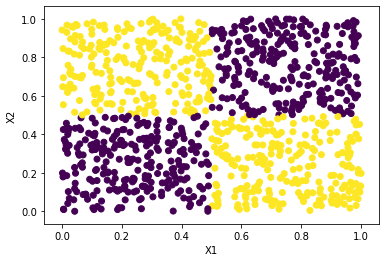

In [73]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## Exercise 1

The preprocessed and imputed house price dataset is loaded into a dataframe below. List the top 3 most important features based on linear dependencies!

In [74]:
df = pd.read_csv("data/house_price_prep_imputed_1.csv")
y = df['SalePrice'].values # the target variable
df.drop(columns=['SalePrice'],inplace=True)
X = df.values # the feature matrix
feature_names = df.columns # feature names

from sklearn.feature_selection import SelectKBest
f_select = SelectKBest(f_regression,k=3)
X_f = f_select.fit_transform(X,y)
plt.show()
# the features selected:
feature_names[f_select.get_support()]

Index(['OverallQual', 'GrLivArea', 'ExterQual'], dtype='object')

### <font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>select features in supervised ML</font>
- **apply principal component analysis to your data**
- <font color='LIGHTGRAY'>engineer features</font>


## PCA example

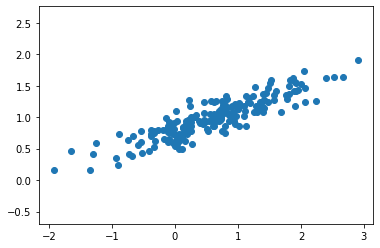

In [23]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

X = np.dot(np.random.rand(2, 2), np.random.randn(2, 200)).T + np.random.rand(2)

plt.scatter(X[:,0],X[:,1])
plt.axis('equal')
plt.show()

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [13]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

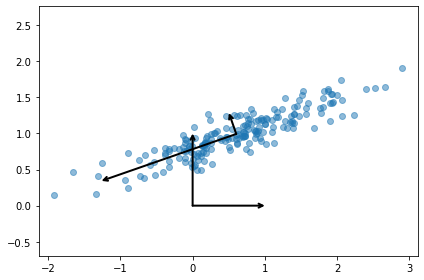

In [14]:
# plot data
plt.scatter(X[:, 0], X[:, 1],alpha=0.5)
for length, vector in zip(pca.explained_variance_ratio_, pca.components_):
    v = vector * 2 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
for length, vector in zip([1.,1.],np.array([[0.,1.],[1.,0.]])):
    v = vector * np.sqrt(length)
    draw_vector([0,0], [0,0] + v)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [18]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


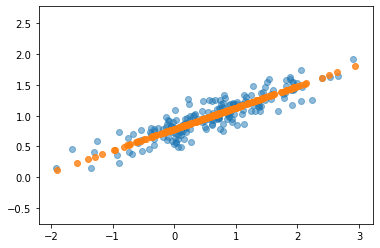

In [22]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')
plt.show()

In [72]:
# let's apply PCA to the house price dataset
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import pandas as pd

df = pd.read_csv('data/house_price_prep_imputed_1.csv')
# save and drop the target variable - PCA should only be applied to the feature matrix!
y = df['SalePrice']
df.drop(columns=['SalePrice'],inplace=True)

pca = PCA(n_components=df.shape[1]) # keep all components
X_pca = pca.fit(df)

## How many principal components should I choose?

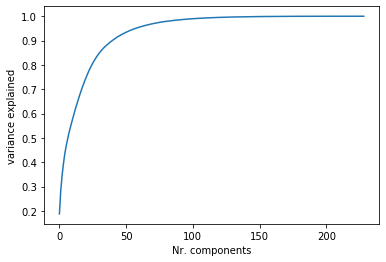

In [73]:
# how much variance is retained?
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nr. components')
plt.ylabel('variance explained')
plt.show()

## Exercise 2

How many components should I use if I want to retain at least 95% of the variance?

In [80]:
sum(np.cumsum(pca.explained_variance_ratio_)<0.95)

57

### <font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>select features in supervised ML</font>
- <font color='LIGHTGRAY'>apply principal component analysis to your data</font>
- **engineer features**


## Feature engineering

Automatic feature engineering:
- combine features in a simple and automatic way (PolynomialFeatures method in sklearn)
- if n_ftrs << n_points, this can modestly improve the predictive power of your model 

Manual feature engineering:
- costly, difficult, project-specific, and requires domain knowledge of the data
- it can boost the predictive power of your model!

### Automatic feature engineering

In [21]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(6).reshape(3, 2)
print(X)

poly = PolynomialFeatures(2)
print(poly.fit_transform(X)) # [1, a, b, a^2, ab, b^2]
poly = PolynomialFeatures(2, include_bias=False)
print(poly.fit_transform(X)) # [a, b, a^2, ab, b^2]
poly = PolynomialFeatures(2,interaction_only=True, include_bias=False)
print(poly.fit_transform(X)) # [a, b, ab]

[[0 1]
 [2 3]
 [4 5]]
[[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]
[[ 0.  1.  0.  0.  1.]
 [ 2.  3.  4.  6.  9.]
 [ 4.  5. 16. 20. 25.]]
[[ 0.  1.  0.]
 [ 2.  3.  6.]
 [ 4.  5. 20.]]


### Manual feature engineering

Some advice:
- EDA can give you insights on how you should engineer and preprocess your features better
- Example from HW2:

<center><img src="figures/hw2_fig.png" width="600"></center>

Some advice:

- non-linear transformations can be helpful
   - e.g., time series data and seasonal variations

<center><img src="figures/date_transform.png" width="600"></center>

### Now you can
- select features in supervised ML
- apply principal component analysis to your data
- engineer features
